# Machine learning with SciKit Learn

<center>
<img src="http://imgs.xkcd.com/comics/tasks.png">
Image credit: xkcd</center>


<small><i>This notebook is inspired by and based on the excellent notebooks by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015 (source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/)) and [Just Markham scikit video lecture](https://github.com/justmarkham/scikit-learn-videos).</i></small>

# What is machine learning?


A high level definition is:

**"Machine learning is the semi-automated extraction of knowledge from data"** 
*(Just Markham)*

## Supervised vs. unsupervised learning

### Supervised learning: Making predictions using data

* **Classification**. 
<img src="images/classification.png" width=250px>

* **Regression**: 

<img src="images/linear_regression.png" width=300px>

### Unsupervised learning: Extracting structure from data

* **Clustering of data**

<img src="images/clustering.png" width=300px>

## Is it supervised or unsupervised learning?

Guess the type of the following machine learning problems:

Problem 1. **Given a photograph of a person, identify the person in the photo.**<br><br>
<!--Supervised (classification)-->

Problem 2. **Given live traffic information, predict the travel time of a specific route.**<br><br>
<!--Supervised (regression)-->


Problem 3. **Given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like.** <br>(Answering this question was worth US$1,000,000 in 2009, Netflix Prize)
<!--Supervised (regression)--><br><br>

Problem 4. **Given a mixture of two sound sources (for example, a person talking over some music), separate the two (blind source separation problem).**
   <!--Unsupervised--><br><br>
<!--4. **Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.**
Unsupervised-->

Example of problem 4 ([Source code](https://github.com/deezer/spleeter)):
* [Original sound](https://mwcampbell.us/tmp/spleeter-demo/jonathan-coulton-re-your-brains/original.mp3)
* [Vocals](https://mwcampbell.us/tmp/spleeter-demo/jonathan-coulton-re-your-brains/stems/vocals.mp3)
* [Accompaniment](https://mwcampbell.us/tmp/spleeter-demo/jonathan-coulton-re-your-brains/stems/accompaniment.mp3)


## How does supervised learning work?

Supervised learning consists of two steps:

1. **Model training**
2. **Prediction of new data**

<img src="images/plot_ML_flow_chart_1.png" width=400px alt="source: wikipedia">

Important choices when designing a supervised model:
    
* Which **features** should be used to train my model?
* Which **machine learning algorithm** to use?
* **Evaluate the quality** of the prediction model. 

# Scikit-Learn: Machine Learning with Python

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python module which implements many well-known machine learning algorithms. It's main advantages are a common interface to many machine learning methods and well chosen default settings.

Useful Resources:

- **scikit-learn:** http://scikit-learn.org (see especially the narrative documentation)
- **matplotlib:** http://matplotlib.org (see especially the gallery section)
- **pandas:** http://pandas.pydata.org (high-performance, easy-to-use data structures and data analysis tools for Python

## Installing scikit-learn

If you use anaconda or [miniconda](http://conda.pydata.org/miniconda.html) install with:
```
$ conda install scikit-learn
```

If you have do not use anaconda, use instead `pip`:
```
$ pip3 install scikit-learn
```

Check versions of the packages with:

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

We will also use matplotlib:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

## Representation of Data in scikit-learn


1. scikit-learn expects data to be stored in a **two-dimensional array (matrix)**.  
1. The array should be a **numpy** array.
1. The size must be **[n_samples, n_features]**:
    - **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
      A sample can be a document, a picture, a sound, a video, an astronomical object or
      a row in database.
      or whatever you can describe with a fixed set of quantitative traits.
    - **n_features:**  The number of features or distinct traits that can be used to describe each
      item in a quantitative manner.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. For high dimensional, sparse data, use ``scipy.sparse`` matrices instead of `numpy.array`.

## A first example: Predicting the Iris flower

As an example we consider a simple dataset.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset:

<div>
<img src="images/iris_setosa.jpg" style="display: inline-block; height:200px">
<img src="images/iris_versicolor.jpg" style="display: inline-block;height:200px">
<img src="images/iris_virginica.jpg" style="display: inline-block;height:200px">
</div>
Iris Setosa (left), Iris Versicolor (middle), Iris Virginica (right)

**Goal**: Predict the species of an Iris using the measurements

This is a **supervised machine learning** task. 

### Question: Which measurements data should be contained in the Iris dataset?

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of (numeric) features for each sample, and feature must be a similar kind of quantity for each sample.

(One) solution: 


<img src="https://github.com/justmarkham/scikit-learn-videos/raw/84f03ae1d048482471f2a9ca85b0c649730cc269/images/03_iris.png">

### Loading the Iris Data with Scikit-Learn

``scikit-learn`` includes a copy of the iris data set:

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

 The data consist of
the following:
- Features in the Iris dataset:
 1. sepal (hanging leaf) length in cm
 2. sepal (hanging leaf) width in cm
 3. petal (standing leaf) length in cm
 4. petal (standing leaf) width in cm

- Target labels to predict:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  

## Inspecting the dataset

Let's inspect the dataset in detail. 

`iris['data']` contains the sample data:

In [6]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Let's see how much data we have:

In [7]:
iris['data'].shape

(150, 4)

Each row represents one flower sample. The meaning of each column is listed in `iris['feature_names']`:

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

`iris['targets']` contains the the target id for each sample:

In [9]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


`iris['target_names']` contains the descriptive name for each labels:

In [10]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


## Training data

For training the machine we will use the following data:

* `iris[data]`:  150 samples with 4 features each
* `iris[target]`:150 labels with 3 label types (*targets*)

## Visualising the data

This data is four dimensional, but we can visualize two of the dimensions
at a time using a scatter-plot:

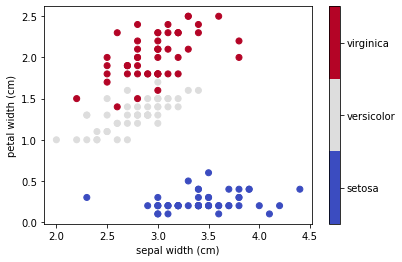

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 1
y_index = 3

plt.scatter(iris.data[:, x_index], 
            iris.data[:, y_index],
            c=iris.target, 
            cmap=plt.cm.get_cmap('coolwarm', 3))

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

# Summary so far

**The setup:**
* 150 observations
* 4 features (sepal length, sepal width, petal length, petal width)
* Label is the iris species
* Classification problem

## K-nearest neighbors (KNN) classification 

**KNN algorithm**

*Input*: New iris features. 

*Out*: Iris target

* Pick a value for K.
* Search for the K neighbours in the sample data that are nearest to the new iris.
* Return the most popular target value from the K nearest neighbors.

**Dataset**
<img src="images/knn_1.png" alt="source:wikipedia" width="400px">
**1-Nearest neighbours classification**
<img src="images/knn_2.png" alt="source:wikipedia" width="400px">
**5-Nearest neighbours classification**
<img src="images/knn_3.png" alt="source:wikipedia" width="400px">
White areas consists of the points where the vote is tight (no most popular target value).

# scikit-learn in 4 steps

**Step 1**: Import the classifier that you plan to use

In [13]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2**: Instantiate an `Estimator`, scikit-learn's term for model.

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

We could tune the model by changing the default parameters.
All parameters not specified are set to their defaults

In [15]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3**: Model training, i.e. fit the model with data. Model is learning the relationship between iris.data and iris.target. This step occurs in-place.

In [16]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=1)

**Step 4**: Predict the response for a new observation. 
New observations are called "out-of-sample" data.
Uses the information it learned during the model training process

In [17]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:

knn.predict([[3, 5, 4, 2],])

array([2])

It returns a NumPy array. We can map this to the label name:

In [18]:
print(iris.target_names[_])

['virginica']



Can predict for multiple observations at once

In [19]:
iris_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(iris_new)

array([2, 1])

You can also do probabilistic predictions:

In [21]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0., 0., 1.]])

## Changing the value of K

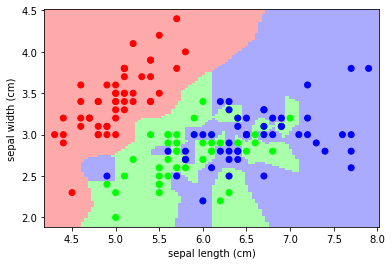

In [22]:
from fig_code import plot_iris
plot_iris(knn)

Easy! We just crate a new classifier, fit the data and perform the prediction:

In [23]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(iris.data, iris.target)

# predict the response for new observations
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array([1, 1])

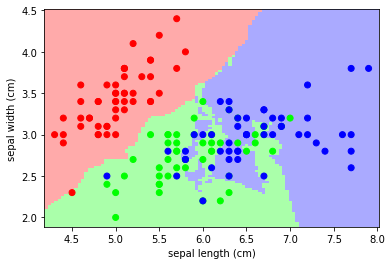

In [24]:
plot_iris(knn)

## Using a different Classification algorithm

In [25]:
# import the class
from sklearn.svm import SVC

# instantiate the model (using the default parameters)
logreg = SVC(gamma='scale')

# fit the model with data
logreg.fit(iris.data, iris.target)

# predict the response for new observations
logreg.predict(iris_new)

array([1, 1])

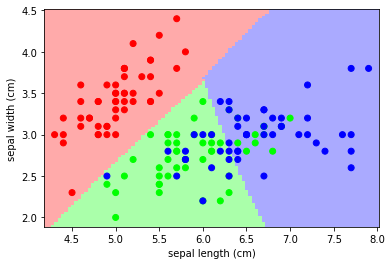

In [26]:
plot_iris(logreg)

## Flow Chart: How to Choose your Estimator

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

<img src="http://scikit-learn.org/dev/_static/ml_map.png">

## How good is my trained model? or performance evaluation of a prediction

## **Training accuracy**: Train and test on the entire dataset

Idea of **training accucarcy**:
     
1. Train the model on the entire dataset.
1. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)

# fit the model with data
logreg.fit(iris.data, iris.target)
logreg.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

scikit provides the function `metrics.accuracy_score` to compute the **training accuracy**:

In [28]:
from sklearn import metrics
metrics.accuracy_score(iris.target, _)

0.9733333333333334

It tells us that we predicted 97% of the predicted samples with the correct label.

Let's test some more:

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

0.9666666666666667

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

1.0

## Evaluation based on cross validation

Idea of **cross validation**:
1. Split the sample dataset into two pieces: a training set and a testing set.
1. Train the model on the training set.
1. Test the model on the testing set, and evaluate the accuracy of the prediction.

### Step 1: Split data set into training and testing sets

`scikit` learn provides the function `train_test_split` to split up the saple test

In [31]:
from sklearn.model_selection import train_test_split

# Randomly split iris.data and iris.target into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.6)

Let's check what we got:

In [32]:
data_train.shape

(60, 4)

In [33]:
data_test.shape

(90, 4)

### Step 2: Fit model using training data

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, target_train)

KNeighborsClassifier(n_neighbors=3)

### Step 3: Predict target values for testing values, evaluate performance

First we predict the target values for the test samples:

In [35]:
knn.predict(data_test)

array([2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2,
       0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2,
       2, 1])

Then we evaluate the performance of the prediction:

In [36]:
metrics.accuracy_score(target_test, _)

0.9555555555555556

#### We can now test the performance of the prediction for different classification algorithms

Text(0, 0.5, 'Testing Accuracy')

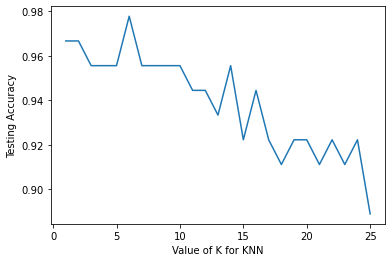

In [37]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    target_pred = knn.predict(data_test)
    scores.append(metrics.accuracy_score(target_test, target_pred))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Step 4 (Optional): Create a confusion matrix to get insight why the algorithm does not perform 

A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:


<img src="images/confusion_matrix.png">


In [38]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train, target_train)
predict_test = knn.predict(data_test)

print(confusion_matrix(predict_test, target_test))

[[29  0  0]
 [ 0 33  2]
 [ 0  1 25]]


# Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.